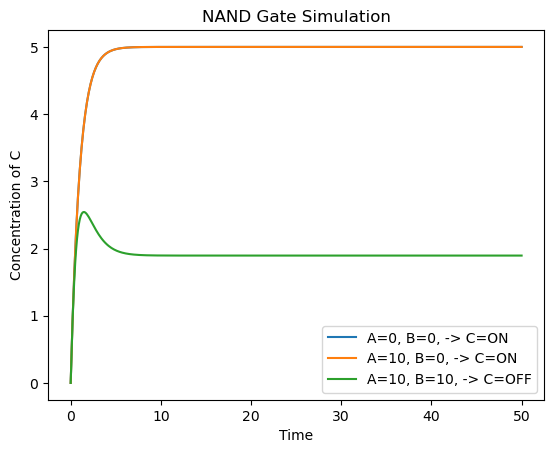

In [4]:
import tellurium as te
import matplotlib.pyplot as plt

model = te.loada("""
model NAND_Gate()
// Species
species A, B, X, C
                 
// Parameters
k = 10 // max productiom rate
K = 5// repression threshold
n = 2 // Hill coefficent
d = 1 // degraxation rate
                 
// Default values
A = 0; B = 0; X = 0; C = 0;
                 
// AND Gate: A and B produce X
J1: -> X ; k*(A^n/(K^n+A^n)*(B^n/(K^n+B^n)))
J2: X -> ; d*X
//NOT Gate: X supress C
J3: -> C ; K/(1 + (X/K)^n)
J4: C -> ; d*C
end
""")

model.reset()
model.A=0
model.B=0
r1 = model.simulate(0, 50, 500)

model.reset()
model.A=10
model.B=0
r2 = model.simulate(0, 50, 500)

model.reset()
model.A=10
model.B=10
r3 = model.simulate(0, 50, 500)

plt.plot(r1[:,0], r1[:,4], label="A=0, B=0, -> C=ON")
plt.plot(r2[:,0], r2[:,4], label="A=10, B=0, -> C=ON")
plt.plot(r3[:,0], r3[:,4], label="A=10, B=10, -> C=OFF")
plt.xlabel("Time")
plt.ylabel("Concentration of C")
plt.title("NAND Gate Simulation")
plt.legend()
plt.show()

